In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import os
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Conv2D,Dropout,Dense,Flatten,Conv2DTranspose,BatchNormalization,LeakyReLU,Reshape
import tensorflow as tf

In [2]:
path_celeb = []
train_path_celeb = "E:/CollegeMaterial/Deep learning/img_align_celeba/img_align_celeba/"
for path in os.listdir(train_path_celeb):
    if '.jpg' in path:
        path_celeb.append(os.path.join(train_path_celeb, path))

In [3]:
new_path=path_celeb[0:50000]
 

In [4]:
import numpy as  np

In [5]:
crop = (30, 55, 150, 175) #croping size for the image so that only the face at centre is obtained
images = [np.array((Image.open(path).crop(crop)).resize((64,64))) for path in new_path]

for i in range(len(images)):
    images[i] = ((images[i] - images[i].min())/(255 - images[i].min()))
    #images[i] = images[i]*2-1  #uncomment this if activation is tanh for generator last layer
    
images = np.array(images) 

In [6]:
train_data=images

In [7]:
print(path_celeb)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [8]:
len(path_celeb)

202599

In [9]:
print(train_data.shape)

(50000, 64, 64, 3)


<Figure size 720x720 with 0 Axes>

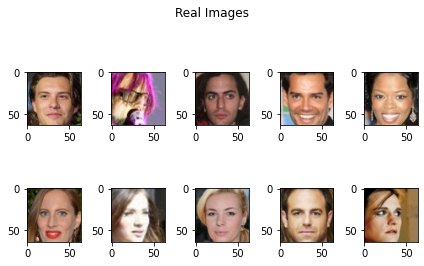

In [10]:
plt.figure(figsize=(10,10))
fig,ax=plt.subplots(2,5)
fig.suptitle("Real Images")
idx=800

for i in range(2):
    for j in range(5):
            ax[i,j].imshow(train_data[idx].reshape(64,64,3))
            #ax[i,j].set_title("Real Image")
            
            idx+=600
            
plt.tight_layout()
plt.show()

In [11]:
X_train = train_data

In [12]:
noise_shape = 100

In [13]:
generator=Sequential()
generator.add(Dense(4*4*512,input_shape=[noise_shape]))
generator.add(Reshape([4,4,512]))
generator.add(Conv2DTranspose(256, kernel_size=4, strides=2, padding="same"))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(64, kernel_size=4, strides=2, padding="same"))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(3, kernel_size=4, strides=2, padding="same",
                                 activation='sigmoid'))

In [14]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8192)              827392    
                                                                 
 reshape (Reshape)           (None, 4, 4, 512)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 8, 8, 256)        2097408   
 nspose)                                                         
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 8, 8, 256)         0         
                                                                 
 batch_normalization (BatchN  (None, 8, 8, 256)        1024      
 ormalization)                                                   
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 16, 16, 128)      5

In [15]:
discriminator=Sequential()
discriminator.add(Conv2D(32, kernel_size=4, strides=2, padding="same",input_shape=[64,64, 3]))
discriminator.add(Conv2D(64, kernel_size=4, strides=2, padding="same"))
discriminator.add(LeakyReLU(0.2))
discriminator.add(BatchNormalization())
discriminator.add(Conv2D(128, kernel_size=4, strides=2, padding="same"))
discriminator.add(LeakyReLU(0.2))
discriminator.add(BatchNormalization())
discriminator.add(Conv2D(256, kernel_size=4, strides=2, padding="same"))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Flatten())
discriminator.add(Dropout(0.5))
discriminator.add(Dense(1,activation='sigmoid'))

In [16]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        1568      
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        32832     
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 16, 16, 64)        0         
                                                                 
 batch_normalization_3 (Batc  (None, 16, 16, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         131200    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                      

In [17]:
GAN =Sequential([generator,discriminator])

In [18]:
discriminator.compile(optimizer='adam',loss='binary_crossentropy')
discriminator.trainable = False

In [19]:
GAN.compile(optimizer='adam',loss='binary_crossentropy')

In [20]:
GAN.layers

In [21]:
GAN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 64, 64, 3)         3585219   
                                                                 
 sequential_1 (Sequential)   (None, 1)                 695009    
                                                                 
Total params: 4,280,228
Trainable params: 3,584,323
Non-trainable params: 695,905
_________________________________________________________________


In [22]:
epochs = 20  #set epoch according to your training dataset size,i had chosen 50k images hence epochs are high as 300...
batch_size = 128

In [23]:
D_loss=[] #list to collect loss for the discriminator model
G_loss=[] #list to collect loss for generator model

In [ ]:
for epoch in range(epochs):
    print(f"Currently on Epoch {epoch+1}")

        # For every batch in the dataset
    for i in range(X_train.shape[0]//batch_size):

        if (i)%100 == 0:
            print(f"\tCurrently on batch number {i} of {len(X_train)//batch_size}")

            noise=np.random.uniform(-1,1,size=[batch_size,noise_shape])

            gen_image = generator.predict_on_batch(noise)

            train_dataset = X_train[i*batch_size:(i+1)*batch_size]
            #train on real image
            train_label=np.ones(shape=(batch_size,1))
            discriminator.trainable = True
            d_loss1 = discriminator.train_on_batch(train_dataset,train_label)

            #train on fake image
            train_label=np.zeros(shape=(batch_size,1))
            d_loss2 = discriminator.train_on_batch(gen_image,train_label)


            noise=np.random.uniform(-1,1,size=[batch_size,noise_shape])
            train_label=np.ones(shape=(batch_size,1))
            discriminator.trainable = False
            #train the generator
            g_loss = GAN.train_on_batch(noise, train_label)
            D_loss.append(d_loss1+d_loss2)
            G_loss.append(g_loss)


        if epoch % 5 == 0:
            samples = 10
            x_fake = generator.predict(np.random.normal(loc=0, scale=1, size=(samples,100)))

            for k in range(samples):
                plt.subplot(2, 5, k+1)
                plt.imshow(x_fake[k].reshape(64,64,3))
                plt.xticks([])
                plt.yticks([])


            plt.tight_layout()
            plt.show()
        print('Epoch: %d,  Loss: D_real = %.3f, D_fake = %.3f,  G = %.3f' %   (epoch+1, d_loss1, d_loss2, g_loss))        
print('Training is complete')

Currently on Epoch 1
	Currently on batch number 0 of 390


In [ ]:
noise=np.random.uniform(-1,1,size=[500,noise_shape])


In [ ]:
im=generator.predict(noise)


In [ ]:
for i in range(5):
    plt.figure(figsize=(7,7))   
    for k in range(20):
                noise=np.random.uniform(-1,1,size=[100,noise_shape])
                im=generator.predict(noise) 
                plt.subplot(5, 4, k+1)
                plt.imshow(im[k].reshape(64,64,3))
                plt.xticks([])
                plt.yticks([])

    plt.tight_layout()
    plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(G_loss,color='red',label='Generator_loss')
plt.plot(D_loss,color='blue',label='Discriminator_loss')
plt.legend()
plt.xlabel('total batches')
plt.ylabel('loss')
plt.title('Model loss per batch')
plt.show()